In [1]:
# Install the necessary packages

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install networkx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv
from operator import itemgetter

In [2]:
# Functions to open CSV files with
def open_and_view_csv_file_contents(filename):
  file_to_view = pd.read_csv(filename)
  return file_to_view


In [ ]:
relationship_nodes = open_and_view_csv_file_contents("/content/relationships_nodes.csv") # Display nodes (the title of the stories)
relationship_nodes.head(n=14)

,title
0,The Goodbye Cat
1,The Goodbye Cat
2,Bringing up Baby
3,Good Father / Bad Father
4,Good Father / Bad Father
5,Cat Island
6,The Night Visitor
7,Finding Hachi / The Travelling Cat Chronicles
8,Life Is Not Always Kind / The Travelling Cat C...
9,The Unsentimental Farmer / The Travelling Cat ...


In [ ]:
relationship_edges = open_and_view_csv_file_contents("/content/relationships_edges.csv") # Display the edges (the cats and their special people)
relationship_edges.head(n=14)

,name,special person
0,Kota Sakuraba,Mrs. Akemi Sakuraba
1,Diana Sakuraba,Hiromi Sakuraba
2,Spin Tsukuda,Shiori Tsukuda
3,Tora,Mom
4,Ten,Dad
5,NaN,NaN
6,Tom,Narrator
7,Hachi,Satoru and Tsutomu (later owner)
8,Nana,Satoru
9,Chatran,Daigo Yoishimine


In [ ]:
# Some of the data has not been appropriately cleaned, so using Pandas comes in handy ...
revised_edges = relationship_edges.rename(columns={'name': 'cat', 'special person': 'person'}) # @https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
revised_edges.head(n=14)

,cat,person
0,Kota Sakuraba,Mrs. Akemi Sakuraba
1,Diana Sakuraba,Hiromi Sakuraba
2,Spin Tsukuda,Shiori Tsukuda
3,Tora,Mom
4,Ten,Dad
5,NaN,NaN
6,Tom,Narrator
7,Hachi,Satoru and Tsutomu (later owner)
8,Nana,Satoru
9,Chatran,Daigo Yoishimine


In [ ]:
# More data revisions, with Pandas coming to the rescue ...
revised_edges = revised_edges.dropna()
revised_edges.loc[0] = ['Kota','Akemi'] # @https://www.digitalocean.com/community/tutorials/update-rows-and-columns-python-pandas
revised_edges.loc[1] = ['Diana','Hiromi']
revised_edges.loc[2] = ['Spin', 'Shiori']
revised_edges.loc[7] = ["Hachi", "Satoru"]
revised_edges.loc[9] = ['Chatran', 'Daigo']

# Add a new row
revised_edges.loc[len(revised_edges)] = ["Hachi", "Tsutomu"]
revised_edges.head(n=14)

,cat,person
0,Kota,Akemi
1,Diana,Hiromi
2,Spin,Shiori
3,Tora,Mom
4,Ten,Dad
6,Tom,Narrator
7,Hachi,Satoru
8,Nana,Satoru
9,Chatran,Daigo
10,Momo,Chikako


In [ ]:
G = nx.from_pandas_edgelist(revised_edges, source = "cat", target = "person", create_using=nx.DiGraph(), edge_attr = None) # Nodes not required

In [ ]:
# Show the nodes
G.nodes()

NodeView(('Kota', 'Akemi', 'Diana', 'Hiromi', 'Spin', 'Shiori', 'Tora', 'Mom', 'Ten', 'Dad', 'Tom', 'Narrator', 'Hachi', 'Satoru', 'Nana', 'Chatran', 'Daigo', 'Momo', 'Chikako', 'Calico', 'Noriko', 'Tsutomu'))

In [ ]:
# Show the edges
G.edges()

OutEdgeView([('Kota', 'Akemi'), ('Diana', 'Hiromi'), ('Spin', 'Shiori'), ('Tora', 'Mom'), ('Ten', 'Dad'), ('Tom', 'Narrator'), ('Hachi', 'Satoru'), ('Hachi', 'Tsutomu'), ('Nana', 'Satoru'), ('Chatran', 'Daigo'), ('Momo', 'Chikako'), ('Calico', 'Noriko')])

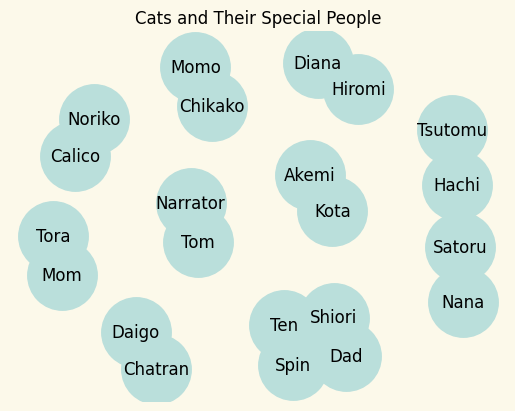

In [ ]:
# Draw the graph
fig, ax = plt.subplots() # Change the background @https://stackoverflow.com/questions/59758133/how-to-change-the-color-of-the-background-in-a-networkx-plot
nx.draw(G, with_labels=True, node_size=2500, node_color="#BADFDB", pos=nx.spring_layout(G, method="energy"))
plt.title("Cats and Their Special People")
ax.set_facecolor('#FCF9EA')
ax.axis('off')
fig.set_facecolor('#FCF9EA')
plt.show()
plt.show()

In [ ]:
relationship_edges = open_and_view_csv_file_contents("/content/relationships-edges_revised.csv")
relationship_edges = relationship_edges.dropna()

# Missed editing some rows in OpenRefine, so Python to the rescue ...
relationship_edges.loc[10] = ["Momo_c", "Chikako"]
relationship_edges.loc[12] = ['Calico_c', 'Noriko']
relationship_edges.head(n=14)

,cat_name,special_person
0,Kota_c,Akemi
1,Diana_c,Hiromi
2,Spin_c,Shiori
3,Tora_c,Mom
4,Ten_c,Dad
5,Hachi_c,Tsutomu
6,Tom_c,Narrator
7,Hachi_c,Satoru
8,Nana_c,Satoru
9,Chatran_c,Daigo


In [ ]:
G = nx.from_pandas_edgelist(relationship_edges, source = "cat_name", target = "special_person", create_using=nx.DiGraph(), edge_attr = None) # Nodes not required

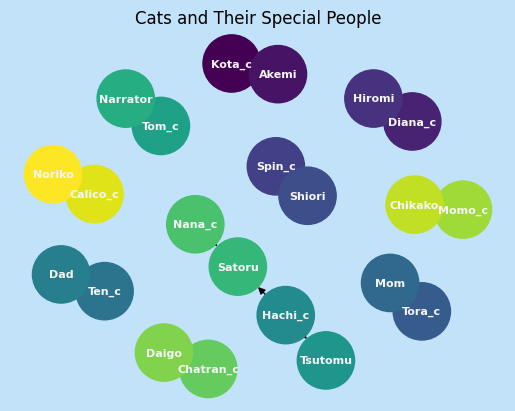

In [ ]:
# Draw an improved version of the graph
fig, ax = plt.subplots() # Change the background @https://stackoverflow.com/questions/59758133/how-to-change-the-color-of-the-background-in-a-networkx-plot
nx.draw(G, with_labels=True, node_size=1700, font_color='whitesmoke', font_weight="bold", font_size="8", node_color=range(22), pos=nx.spring_layout(G, method="energy")) # https://networkx.org/documentation/stable/auto_examples/drawing/plot_node_colormap.html
plt.title("Cats and Their Special People")
ax.set_facecolor('#C2E2FA')
ax.axis('off')
fig.set_facecolor('#C2E2FA')
plt.show()
plt.show()

In [ ]:
breed_edges = open_and_view_csv_file_contents("/content/cat_breed_edges.csv")
# More editing ...
breed_edges.loc[3] = ["Tora", "Tiger tabby"]
breed_edges.loc[6] = ['Tom', 'Black tabby']
breed_edges.head(n=14)

,name,breed
0,Kota,Silver tabby
1,Diana,Persian
2,Spin,Orange tabby
3,Tora,Tiger tabby
4,Ten,Tortoise shell
5,Unknown,Black tabby
6,Tom,Black tabby
7,Hachi,White tabby
8,Nana,White tabby
9,Chatran,Orange tabby


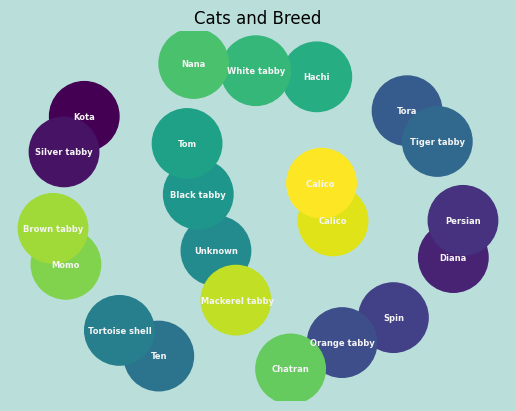

In [ ]:
# Draw the graph
G = nx.from_pandas_edgelist(breed_edges, source = "name", target = "breed", create_using=nx.DiGraph(), edge_attr = None) # Nodes not required
fig, ax = plt.subplots()
nx.draw(G, with_labels=True, node_size=2500, font_color='whitesmoke', font_weight="bold", font_size="6", node_color=range(22), pos=nx.fruchterman_reingold_layout(G, method="energy"))
plt.title("Cats and Breed")
ax.set_facecolor('#BADFDB')
ax.axis('off')
fig.set_facecolor('#BADFDB')
plt.show()
plt.show()

In [13]:
life_span_edges = open_and_view_csv_file_contents("/content/cats_life_span.csv")
# Editing of the CSV file ...
life_span_edges = life_span_edges.dropna()
life_span_edges = life_span_edges.drop(10)
life_span_edges.loc[6] = ['Momo', '15']
life_span_edges.head(n=14)


,name,life_span
0,Kota,23
1,Diana,16
3,Tora,18
7,Hachi,5
6,Momo,15


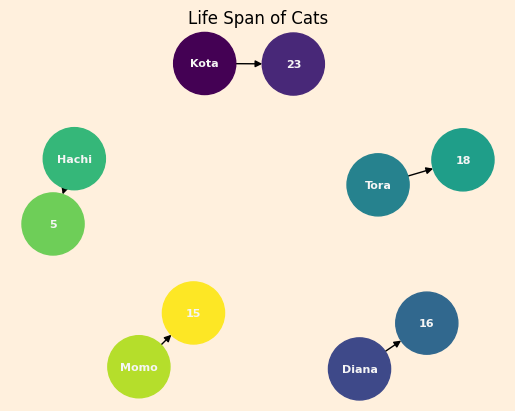

In [25]:
# Draw the graph
G = nx.from_pandas_edgelist(life_span_edges, source = "name", target = "life_span", create_using=nx.DiGraph(), edge_attr = None) # Nodes not required
fig, ax = plt.subplots()
nx.draw(G, with_labels=True, node_size=2000, font_color='whitesmoke', font_weight="bold", font_size="8", node_color=range(10), pos=nx.spring_layout(G, method="energy"))
plt.title("Life Span of Cats")
ax.set_facecolor('#FFF0DD')
ax.axis('off')
fig.set_facecolor('#FFF0DD') # https://colorhunt.co
plt.show()
plt.show()